<ipython-input-7-2c6760365f2a>:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'timestamp': pd.date_range(start='2023-01-01', periods=15, freq='M')


KS Statistic: 0.5000
P-value: 0.1925
No significant data drift detected.


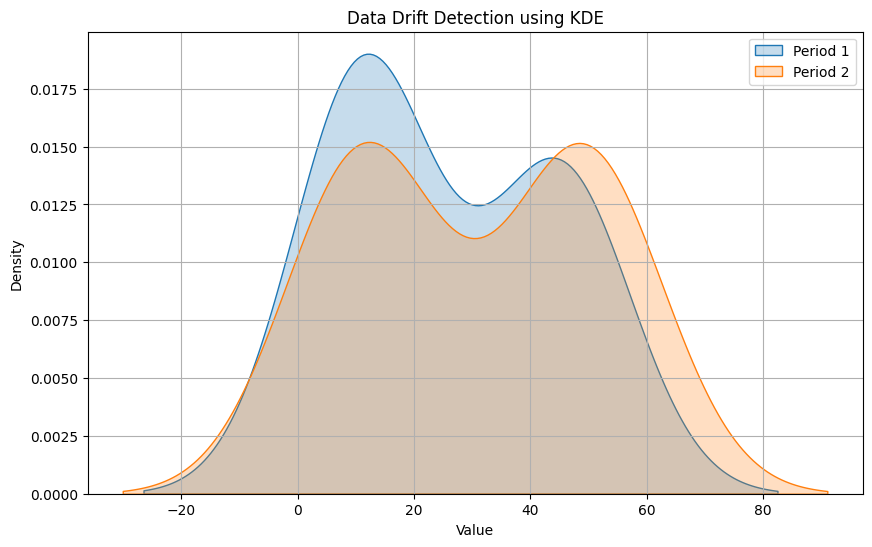

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp

# Sample dataset (replace with your actual data and timestamps)
data = {
    'value': [10, 12, 11, 13, 45, 46, 44, 47, 10, 11, 13, 12, 50, 51, 49],
    'timestamp': pd.date_range(start='2023-01-01', periods=15, freq='M')
}
df = pd.DataFrame(data)

# Define time periods for comparison
period1 = df[df['timestamp'] < '2023-08-01']
period2 = df[df['timestamp'] >= '2023-08-01']

# Check if periods have enough data
if period1.empty or period2.empty:
    print("One or both time periods have no data.")
else:
    # KS test to detect drift
    stat, p_value = ks_2samp(period1['value'], period2['value'])

    print(f"KS Statistic: {stat:.4f}")
    print(f"P-value: {p_value:.4f}")
    if p_value < 0.05:
        print("Significant data drift detected.")
    else:
        print("No significant data drift detected.")

    # Plot comparison
    plt.figure(figsize=(10, 6))
    sns.kdeplot(period1['value'], label='Period 1', fill=True)
    sns.kdeplot(period2['value'], label='Period 2', fill=True)
    plt.title('Data Drift Detection using KDE')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()
